# Introduction:
Food waste is one of the pressing issues of our time. On one hand while there still exists hunger and malnourishment conditions in some parts of the world, food waste on the other hand is directly in contrast with not only that but also detrimental to the environment because of poor management leading to ecological impacts least of which is green house gas emissions. We shall do some exploratory data analysis of the global food waste dataset.

# Data Preparation:
We are going to use the Global Food Waste dataset (https://www.kaggle.com/datasets/joebeachcapital/food-waste/data) for this model and then check for null values and remove them.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-waste/Food Waste data and research - by country.csv


In [2]:
# Assigning the data to a dataframe
df = pd.read_csv(os.path.join(dirname, filename))

In [3]:
# Eye-test the data (esp. column names)
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [4]:
# Check for null values
df.isnull().sum()

Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64

In [5]:
# No nulls, next rename the columns
newcolnames = ['country','combined_percapita','household_percapita','household_tonnes','retail_percapita','retail_tonnes','food_service_percapita','food_service_tonnes','estimate_confidence','m49_code','region','source']
df.columns=newcolnames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 214 non-null    object
 1   combined_percapita      214 non-null    int64 
 2   household_percapita     214 non-null    int64 
 3   household_tonnes        214 non-null    int64 
 4   retail_percapita        214 non-null    int64 
 5   retail_tonnes           214 non-null    int64 
 6   food_service_percapita  214 non-null    int64 
 7   food_service_tonnes     214 non-null    int64 
 8   estimate_confidence     214 non-null    object
 9   m49_code                214 non-null    int64 
 10  region                  214 non-null    object
 11  source                  214 non-null    object
dtypes: int64(8), object(4)
memory usage: 20.2+ KB


# Exploratory Data Analysis
Let's begin with finding basic statistics of the combined estimate/kg/year/capita

In [6]:
#Basic statistical EDA
df['combined_percapita'].describe()

count    214.000000
mean     126.794393
std       22.157879
min       61.000000
25%      115.000000
50%      123.000000
75%      137.750000
max      260.000000
Name: combined_percapita, dtype: float64

In [7]:
#Find the countries with the maximum and minimum combined estimate
df.iloc[df['combined_percapita'].idxmax()]

country                                                            Malaysia
combined_percapita                                                      260
household_percapita                                                      91
household_tonnes                                                    2921577
retail_percapita                                                         79
retail_tonnes                                                       2518199
food_service_percapita                                                   90
food_service_tonnes                                                 2861537
estimate_confidence                                       Medium Confidence
m49_code                                                                458
region                                                   South-eastern Asia
source                    https://www.unep.org/resources/report/unep-foo...
Name: 116, dtype: object

In [8]:
#Find the country with the minimum combined estimate
df.iloc[df['combined_percapita'].idxmin()]

country                                                            Slovenia
combined_percapita                                                       61
household_percapita                                                      34
household_tonnes                                                      71107
retail_percapita                                                          7
retail_tonnes                                                         13910
food_service_percapita                                                   20
food_service_tonnes                                                   41741
estimate_confidence                                       Medium Confidence
m49_code                                                                705
region                                                      Southern Europe
source                    https://www.unep.org/resources/report/unep-foo...
Name: 175, dtype: object

<Axes: title={'center': '10 Largest Combined Per-Capita Per-kg Per-year Food Waste'}, xlabel='Countries', ylabel='Combined estimate/kg/capita/year'>

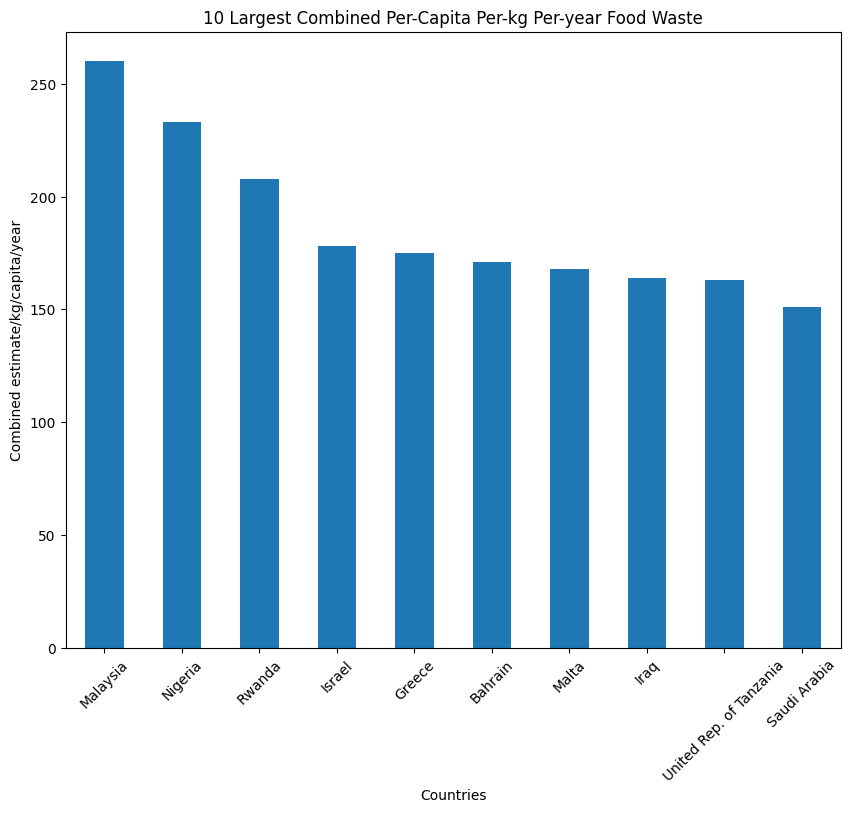

In [9]:
#Plot the top 10 countries with maximum combined estimate
df.nlargest(10, ['combined_percapita']).plot(x="country", y="combined_percapita",
        kind="bar", legend=False, rot = 45, figsize=(10, 8), xlabel='Countries', ylabel='Combined estimate/kg/capita/year', title='10 Largest Combined Per-Capita Per-kg Per-year Food Waste') 


<Axes: title={'center': '10 Lowest Combined Per-Capita Per-kg Per-year Food Waste'}, xlabel='Countries', ylabel='Combined estimate/kg/capita/year'>

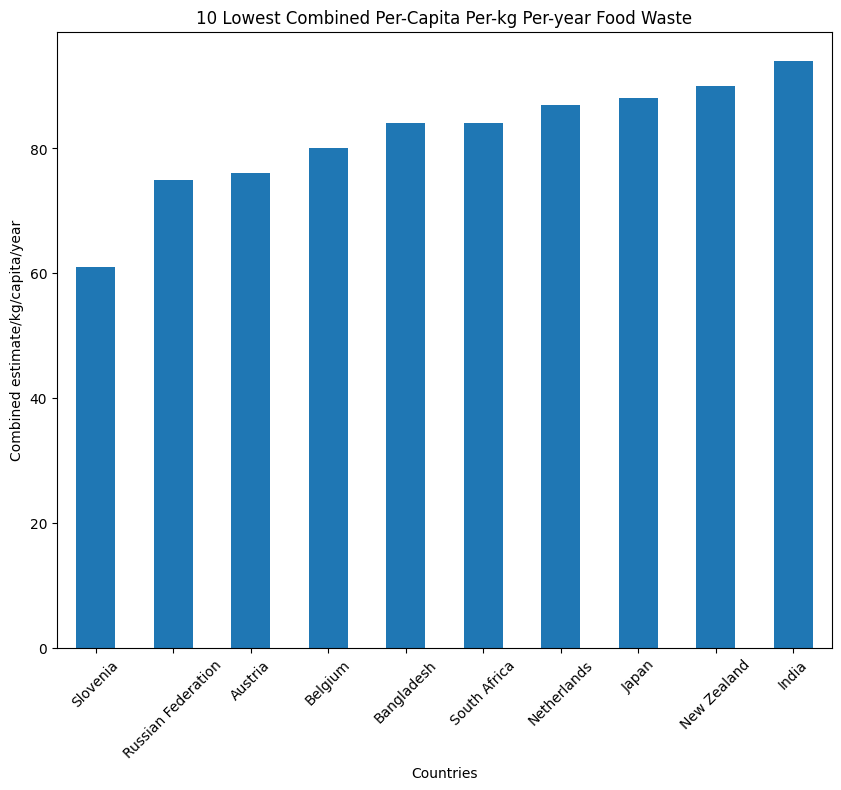

In [10]:
#Plot the bottom 10 countries with minimum combined estimate
df.nsmallest(10, ['combined_percapita']).plot(x="country", y="combined_percapita",
        kind="bar", figsize=(10, 8), legend=False, rot = 45, xlabel='Countries', ylabel='Combined estimate/kg/capita/year', title='10 Lowest Combined Per-Capita Per-kg Per-year Food Waste') 

<Axes: title={'center': 'combined_percapita'}, xlabel='Regions', ylabel='Combined estimate/kg/capita/year'>

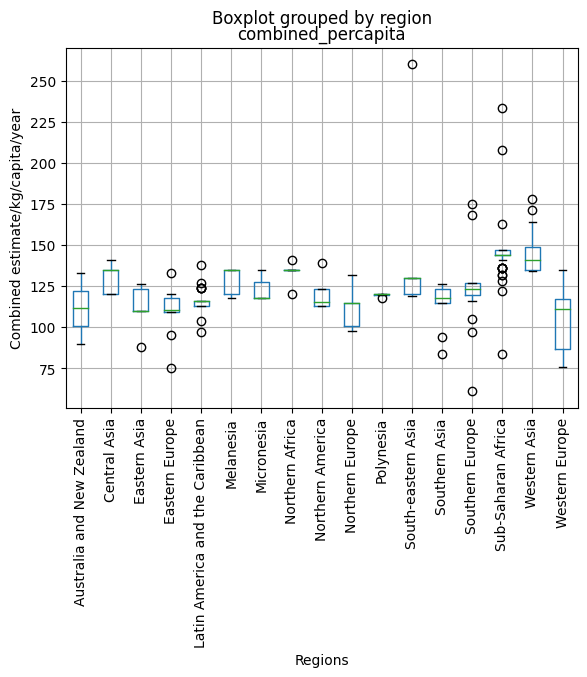

In [11]:
#Scatter plot regionwise to see
df.boxplot(column='combined_percapita', by='region', rot=90,
               xlabel ='Regions', ylabel='Combined estimate/kg/capita/year')

We can see from regionwise distribution that while there are some outliers, countries are usually in the range 75~175 kg/capita/year. Let us look into the outliers:

<Axes: title={'center': 'Outlier Countries with Combined Per-Capita Per-kg Per-year Food Waste'}, xlabel='Countries', ylabel='Combined estimate/kg/capita/year'>

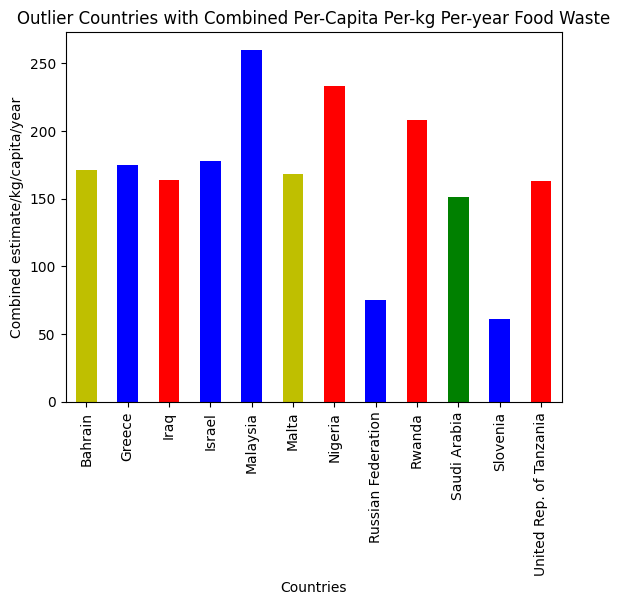

In [12]:
#Outliers analysis
df_outliers = df[(df['combined_percapita'] <= 75) | (df['combined_percapita'] >= 150)]
colors={'Very Low Confidence':'r','Low Confidence':'y','Medium Confidence':'b','High Confidence':'g'}
df_outliers.plot(x='country',y='combined_percapita', kind='bar', legend=False,
                 xlabel ='Countries', ylabel='Combined estimate/kg/capita/year', title='Outlier Countries with Combined Per-Capita Per-kg Per-year Food Waste',
                color=[colors[i] for i in df_outliers['estimate_confidence']])


We can see that with the exception of Malaysia, african countries like Nigeria, Rwanda and Tanzania are outliers with 'very low confidence' quality data and therefore calls into question the analysis. Let's breakdown the data category-wise grouping by region and taking the average per-capita values.

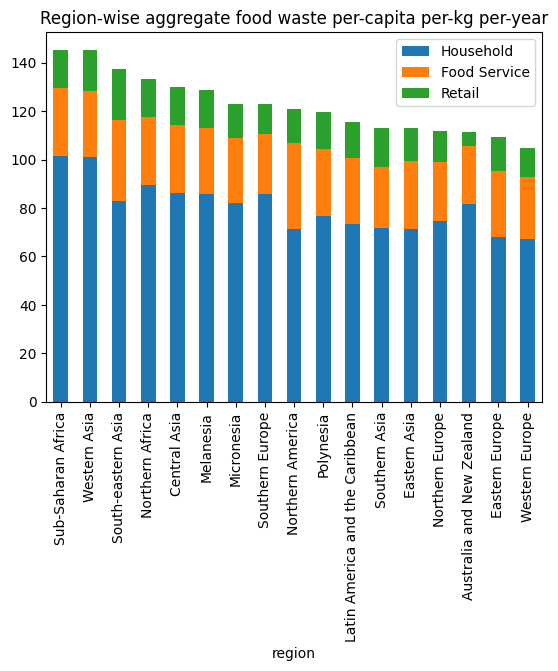

In [13]:
df_region=df[["region","household_percapita","food_service_percapita","retail_percapita","combined_percapita"]]
df_region=df_region.groupby(["region"],as_index=False).mean()
df_region=df_region.sort_values(by=['combined_percapita'],ascending=False)
df_region.pop("combined_percapita")
df_region.plot(x='region', kind='bar', legend=True, stacked=True, title='Region-wise aggregate food waste per-capita per-kg per-year')
plt.legend(["Household","Food Service","Retail"])
plt.show()

# Conclusion
We can see with the regio-wise grouping of average per-capita combined food waste estimates that sub-saharan Africa has the highest average estimate. This is also an anamoly considering countries in sub-saharan Africa also scores the worst in global hunger indices (https://www.globalhungerindex.org/), and thus calls into question the quality of the data for that region. 